# Implementing Machine Learning Regression Algorithms

In [1]:
# Import libraries and perform basic filtering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV

from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GroupShuffleSplit, ShuffleSplit, StratifiedShuffleSplit, GridSearchCV, GroupKFold
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, \
AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectFromModel, f_regression, SelectKBest
from sklearn.model_selection import learning_curve, StratifiedKFold, KFold

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict

pd.set_option('display.max_columns', None)

df = pd.DataFrame.from_csv('data.csv').set_index(['Name', 'Season']).reset_index()
df = df.loc[(df['Season'] != 2017) & (df['Season'] != 2016)]
df['Valid'] = df['Drafted'] - df['Season']
df = df.loc[df['Valid'] >= 0]
df.replace(np.inf, np.nan, inplace=True)
print len(df)
print len(df.columns)
df.head()

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


1809
79


,Name,Season,Url,0,% shots 2pt J,% shots at rim,%assisted 2pt J,%assisted 3s,%assisted at rim,%of shots 3pt,2P%,2P%2PM,2PM,2PtJ,2PtJ2Pt%,3P%,3P%3PM,3PA,3PM,3PMAss,3PMUn,AST,ATr,Age,Agility,BLK,BPM,DBPM,DEF,D_Score,Drafted,FG%,FG% 2pt Jumpers,FG% at rim,FGA,FGM,FGatRim,FT%,FTA,FTM,FTr,Height,IS_Score,League,MIN,Max_Vert,NS_Vert,OBPM,OFF,OS_Score,PF,PTS,P_Score,Pick,RimUnAssisted,STL,Score,Skill,Skill1,Speed,Stocks2,TOV,TRB,TRBAST,TS,WHr,WSPredict,WSTOT,Weight,WeightFlag,Wingspan,WtHr,Ath,Mix,Mix2,Mix3,Vert_adj,Move_adj,Valid
0,A.J. Hammons,2013.0,http://basketball.realgm.com/player/AJ-Hammons...,NaN,20.333856,6.670832,22.281820,0.0,77.5,0.000000,0.437981,2.354258,4.372829,1.716072,0.978311,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.056170,0.767384,20.345434,100000.00,1.342745,5.6,4.6,2.617049,NaN,2016.0,0.290195,32.5,593.208071,16.326556,7.150723,3.408352,0.315821,5.092456,1.662625,0.351050,3108.632658,NaN,Non-NBA,6.666957,100000.0,100000.0,1.0,1.647328,NaN,2.454347,69.081587,NaN,46.0,1.074288,0.781899,28.815063,0.338068,0.694522,100000.00,1.187323,2.150483,3.380459,1.941876,0.417116,1.061544,0.593927,-0.025231,10.630146,NaN,221.651978,0.530516,0.368564,0.344462,3.483227,71.181716,NaN,NaN,3.0
1,A.J. Hammons,2014.0,http://basketball.realgm.com/player/AJ-Hammons...,NaN,21.098492,6.284903,22.521268,0.0,61.6,3.263127,0.460954,2.128560,3.804892,1.591883,0.915852,0.000000,0.000000,0.245438,0.000000,0.0,0.0,0.969499,0.611954,21.345434,100000.00,1.466858,5.4,7.0,2.950430,NaN,2016.0,0.304378,33.1,730.350417,13.131843,5.940046,2.937364,0.344472,5.962003,1.874271,0.483905,3108.632658,NaN,Non-NBA,6.652863,100000.0,100000.0,-1.5,1.589293,NaN,2.810108,61.710765,NaN,46.0,1.270976,0.847456,26.935749,0.258961,0.543203,100000.00,1.350351,2.782092,3.578619,1.834023,0.436484,1.061544,0.593927,-0.025231,10.630146,NaN,221.651978,0.530516,0.601541,0.358618,3.212347,55.394662,NaN,NaN,2.0
2,A.J. Hammons,2015.0,http://basketball.realgm.com/player/AJ-Hammons...,NaN,20.086047,6.557439,24.070694,0.0,69.4,3.718064,0.487704,2.725386,4.669934,1.819408,1.108197,0.000000,0.000000,0.336496,0.000000,0.0,0.0,1.156358,0.794791,22.345434,100000.00,1.459203,8.9,7.7,2.805172,NaN,2016.0,0.330653,37.1,694.183192,16.341573,7.805743,3.595910,0.299418,5.622863,1.760547,0.387346,3108.632658,NaN,Non-NBA,6.717805,100000.0,100000.0,1.2,1.632738,NaN,2.719051,79.495443,NaN,46.0,1.298374,0.959014,35.430509,0.409619,0.793935,100000.00,1.428987,2.606007,3.510437,2.166571,0.445692,1.061544,0.593927,-0.025231,10.630146,NaN,221.651978,0.530516,0.542051,0.494257,4.071268,92.195729,NaN,NaN,1.0
4,A.J. Price,2007.0,http://basketball.realgm.com/player/AJ-Price/S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.354959,1.234178,2.683765,NaN,NaN,0.102249,0.182522,3.855952,0.873288,NaN,NaN,1.623205,1.317242,20.233562,10.99,0.558000,-100000.0,-100000.0,1.764075,1.751379,2009.0,0.202387,NaN,NaN,14.363011,4.564299,NaN,0.328509,4.613243,1.396270,0.305510,2577.726130,10.247271,Non-NBA,6.610696,31.0,31.5,-100000.0,1.243368,2.732442,1.843059,43.516196,3.79097,52.0,NaN,1.464041,15.172281,0.745485,1.536841,3.22,0.675166,2.286404,2.242753,2.430883,0.348658,1.020013,1.660000,4.722121,9.380832,NaN,190.500000,0.468085,0.249581,0.828565,1.648470,31.985294,976.5,35.3878,2.0
5,A.J. Price,2008.0,http://basketball.realgm.com/player/AJ-Price/S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.387848,1.361934,2.771149,NaN,NaN,0.160677,0.373663,4.318931,1.192292,NaN,NaN,1.694557,1.462279,21.233562,10.99,0.564656,-100000.0,-100000.0,1.831748,1.751379,2009.0,0.242850,NaN,NaN,14.354722,5.156643,NaN,0.415161,4.587792,1.446945,0.303956,2577.726130,10.247271,Non-NBA,6.966024,31.0,31.5,-100000.0,0.998205,2.732442,1.796383,53.544586,3.79097,52.0,NaN,1.319595,21.476827,0.993896,1.798426,3.22,0.648641,2.051633,2.094224,2.452266,0.401102,1.020013,1.660000,4.722121,9.380832,NaN,190.500000,0.468085,0.226483,0.896915,1.729168,44.210918,976.5,35.3878,1.0


In [2]:
df.loc[df['Drafted'] == 2004]

,Name,Season,Url,0,% shots 2pt J,% shots at rim,%assisted 2pt J,%assisted 3s,%assisted at rim,%of shots 3pt,2P%,2P%2PM,2PM,2PtJ,2PtJ2Pt%,3P%,3P%3PM,3PA,3PM,3PMAss,3PMUn,AST,ATr,Age,Agility,BLK,BPM,DBPM,DEF,D_Score,Drafted,FG%,FG% 2pt Jumpers,FG% at rim,FGA,FGM,FGatRim,FT%,FTA,FTM,FTr,Height,IS_Score,League,MIN,Max_Vert,NS_Vert,OBPM,OFF,OS_Score,PF,PTS,P_Score,Pick,RimUnAssisted,STL,Score,Skill,Skill1,Speed,Stocks2,TOV,TRB,TRBAST,TS,WHr,WSPredict,WSTOT,Weight,WeightFlag,Wingspan,WtHr,Ath,Mix,Mix2,Mix3,Vert_adj,Move_adj,Valid
90,Andre Emmett,2003.0,http://basketball.realgm.com/player/Andre-Emme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.453685,2.856011,5.166470,NaN,NaN,0.116545,0.064830,1.138506,0.376345,NaN,NaN,1.226746,1.013601,20.345434,10.66,0.828410,-100000.0,-100000.0,2.252714,NaN,2004.0,0.293720,NaN,NaN,20.825107,9.203234,NaN,0.360944,5.088390,1.699148,0.292248,2744.000000,NaN,Non-NBA,7.137278,36.0,24.0,-100000.0,1.368172,NaN,1.643529,96.803511,NaN,35.0,NaN,1.469012,41.353666,0.531183,1.001970,3.15,1.004056,1.790314,2.771378,2.042219,0.427192,1.075459,0.040909,0.081818,10.099505,NaN,205.740000,0.520408,0.355650,0.769844,2.327064,81.283712,864.0,33.5790,1.0
91,Andre Emmett,2004.0,http://basketball.realgm.com/player/Andre-Emme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.480925,2.649840,4.588405,NaN,NaN,0.159339,0.116544,1.352679,0.499695,NaN,NaN,1.222855,1.008263,21.345434,10.66,0.737179,-100000.0,-100000.0,2.293974,NaN,2004.0,0.318785,NaN,NaN,17.206665,8.021103,NaN,0.389017,5.787080,1.874644,0.383530,2744.000000,NaN,Non-NBA,7.138073,36.0,24.0,-100000.0,1.339648,NaN,1.613636,89.896402,NaN,35.0,NaN,1.191997,41.417562,0.568056,1.013778,3.15,0.804842,1.794742,2.775946,2.037419,0.460725,1.075459,0.040909,0.081818,10.099505,NaN,205.740000,0.520408,0.337013,0.671571,2.063279,66.817342,864.0,33.5790,0.0
92,Andre Iguodala,2003.0,http://basketball.realgm.com/player/Andre-Iguo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.381882,1.260111,2.593951,NaN,NaN,0.069627,0.069997,2.452452,0.515729,NaN,NaN,1.443932,1.157435,18.926027,11.17,0.996397,-100000.0,-100000.0,2.440479,3.969659,2004.0,0.195961,NaN,NaN,11.785417,3.977674,NaN,0.300763,4.532778,1.526461,0.398995,2786.106961,18.686608,Non-NBA,6.419995,34.5,24.0,-100000.0,1.563345,3.756835,2.451633,36.004668,5.143785,9.0,NaN,1.735218,13.011400,0.603961,1.250666,3.18,1.312531,2.159383,3.140523,2.558867,0.361381,1.098677,9.230000,89.610415,9.899495,NaN,210.820000,0.494949,0.689850,0.905453,3.621855,41.522927,828.0,35.5206,1.0
93,Andre Iguodala,2004.0,http://basketball.realgm.com/player/Andre-Iguo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.436620,1.593544,2.966786,NaN,NaN,0.132621,0.177266,2.624052,0.750173,NaN,NaN,1.586803,1.273265,19.926027,11.17,0.789474,-100000.0,-100000.0,2.742021,3.969659,2004.0,0.252376,NaN,NaN,12.387684,4.944627,NaN,0.489304,4.064810,1.539048,0.344675,2786.106961,18.686608,Non-NBA,6.869014,34.5,24.0,-100000.0,1.433995,3.756835,2.183092,48.201233,5.143785,9.0,NaN,1.393493,20.942289,0.877825,1.547030,3.18,0.931945,2.307371,3.243399,2.857744,0.434476,1.098677,9.230000,89.610415,9.899495,NaN,210.820000,0.494949,0.379186,0.960714,3.260298,48.452370,828.0,35.5206,0.0
123,Antonio Burks,2003.0,http://basketball.realgm.com/player/Antonio-Bu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.397380,1.642408,3.281529,NaN,NaN,0.109639,0.017467,0.336219,0.145103,NaN,NaN,1.752284,1.496729,22.905708,100000.00,0.678985,-100000.0,-100000.0,1.648456,0.816323,2004.0,0.277817,NaN,NaN,12.607657,4.952676,NaN,0.363994,3.494765,1.180562,0.255208,2516.272044,4.931172,Non-NBA,6.507278,100000.0,24.0,-100000.0,0.632485,0.743724,2.162930,38.109508,1.995964,36.0,NaN,1.469364,14.442455,0.993929,1.866125,100000.00,0.823047,2.151596,1.738852,2.310659,0.378972,1.108243,0.010000,0.020000,9.539392,NaN,198.120000,0.491892,0.254615,0.975757,1.767120,38.729039,NaN,NaN,1.0
150,Babby Araujo,2003.0,http://basketball.realgm.com/player/Babby-Arau...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.465870,2.398410,4.253288,NaN,NaN,0.102249,0.022328,0.471692,0.180635,NaN,NaN,1.229430,0.808465

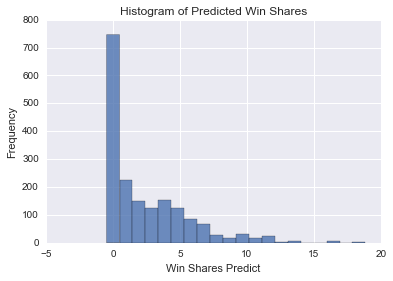

In [3]:
# Plot the target
plt.figure()
plt.title('Histogram of Predicted Win Shares')
plt.xlabel('Win Shares Predict')
df['WSPredict'].plot.hist(bins=20, alpha=0.8)

## Feature Examination

In [4]:
possible = list(df[['Age', 'PTS', 'TS', 'TRB', 'STL', 'BLK', 'AST', 'ATr', 'PF', 'FTr', 'FT%']])

target_cols = list(df[['WSPredict']])

X = df[possible].fillna(0)
y = df[target_cols]
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns=possible)
X.head()

groups = list(df['Url'])
group_kfold = GroupShuffleSplit(n_splits=1000)
for train_index, test_index in group_kfold.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
    
# Use Random Forest for feature importances
def FeatureComparison(X_train, X_test, Y_train, Y_test):
    reg = RandomForestRegressor(max_features=None)
    reg.fit(X_train, Y_train)
    feature_names = sorted([(possible[i], reg.feature_importances_[i]) for i in range(len(possible))], \
                           key=lambda x: x[1], reverse=True)
    print "Regressor: Random Forest"
    print "Feature Names and Importance Scores:", feature_names
    print
    reg = ExtraTreesRegressor(max_features=None)
    reg.fit(X_train, Y_train)
    feature_names = sorted([(possible[i], reg.feature_importances_[i]) for i in range(len(possible))], \
                           key=lambda x: x[1], reverse=True)
    print "Regressor: Extra Trees"
    print "Feature Names and Importance Scores:", feature_names
    
FeatureComparison(X_train, X_test, Y_train, Y_test)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Regressor: Random Forest
Feature Names and Importance Scores: [('PTS', 0.15806480171857257), ('Age', 0.1361139108188035), ('STL', 0.092195730836047013), ('AST', 0.089708646774024459), ('FTr', 0.089070505208185505), ('TS', 0.088564703721605798), ('BLK', 0.081174388392878966), ('FT%', 0.068838407837009202), ('TRB', 0.068381892888291482), ('PF', 0.067827200790151546), ('ATr', 0.060059811014429865)]

Regressor: Extra Trees
Feature Names and Importance Scores: [('PTS', 0.13369407642520825), ('Age', 0.12381958059281635), ('FTr', 0.091249954120353027), ('AST', 0.087374469297920962), ('FT%', 0.085392041951830103), ('TS', 0.083761981382753189), ('ATr', 0.081261592582577272), ('STL', 0.080916028192800665), ('TRB', 0.078499976099783444), ('PF', 0.07757272252660849), ('BLK', 0.076457576827348286)]


C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


## Perform Linear Regression

In [5]:
feature_cols = list(df[['Age', 'PTS', 'TS', 'TRB', 'STL', 'BLK', 'AST', 'ATr', 'PF', 'FTr', 'FT%']])
target_cols = list(df[['WSPredict']])

groups = list(df['Url'])
X = df[feature_cols].fillna(np.mean(df[feature_cols]))
y = df[target_cols]
X = pd.DataFrame(X, columns=feature_cols)

In [6]:
lr = linear_model.LinearRegression()
lr.fit(X, y)

predicted = cross_val_predict(lr, X, y, groups=groups, cv=100)
RMSE = mean_squared_error(y, predicted)**0.5
print "RMSE:", RMSE
print "Coefficients:", lr.coef_

df['LinearPred'] = predicted

# Sort by linear prediction
df_sort = df.sort('LinearPred', ascending=False)[['Name', 'Season', 'LinearPred']]
df_sort[0:50]

RMSE: 2.8235048691
Coefficients: [[-0.70540745  0.02541706  8.45217774  0.88573776  1.23492273  1.67931227
   3.45481179 -0.51127576 -0.83834346  2.56761883  0.54077261]]


C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Name,Season,LinearPred
1347,Michael Beasley,2008.0,7.239011
1166,Kyrie Irving,2011.0,6.866329
166,Blake Griffin,2009.0,6.722466
1106,Kevin Durant,2007.0,6.699285
820,James Harden,2008.0,6.628177
98,Andrew Bogut,2005.0,6.466555
11,Aaron Gordon,2013.0,6.454161
1107,Kevin Love,2008.0,6.453714
605,Enes Kanter,2011.0,6.415143
1889,Tyreke Evans,2007.0,6.365432


In [7]:
# Determine Error
df['LinearErr'] = df['WSPredict'] - df['LinearPred']

## Implement Machine Learning Algorithm to Estimate Error

In [8]:
feature_cols1 = list(df[['LinearPred', 'Age', 'Skill', 'Score', 'Ath', 'Mix', 'Mix2', 'Mix3', 'WeightFlag', 'Max_Vert', 'Move_adj', 'DBPM', 'OBPM', 'Height']])
X = df[feature_cols1].fillna(0)
y = df['LinearErr']
X = pd.DataFrame(X, columns=feature_cols1)

groups = list(df['Url'])
group_kfold = GroupShuffleSplit()
for train_index, test_index in group_kfold.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]

In [9]:
RMSE = make_scorer(mean_squared_error, greater_is_better = False)

N = float(len(df))
p = float(len(feature_cols))
targets = 1

def RandomForest(X_train, X_test, Y_train, Y_test):
    reg = RandomForestRegressor(max_features=None)
    reg.fit(X_train, Y_train)
    feature_names = sorted([(feature_cols[i], reg.feature_importances_[i]) for i in range(len(feature_cols))], \
                           key=lambda x: x[1], reverse=True)
    
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Random Forest"
    print "Feature Names and Importance Scores:", feature_names
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    
def Tree(X_train, X_test, Y_train, Y_test):
    reg = DecisionTreeRegressor()
    reg.fit(X_train, Y_train)
    feature_names = sorted([(feature_cols[i], reg.feature_importances_[i]) for i in range(len(feature_cols))], \
                           key=lambda x: x[1], reverse=True)
    
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Decision Tree"
    print "Feature Names and Importance Scores:", feature_names
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
def ExtraTrees(X_train, X_test, Y_train, Y_test):
    reg = ExtraTreesRegressor(max_features=None)
    reg.fit(X_train, Y_train)
    feature_names = sorted([(feature_cols[i], reg.feature_importances_[i]) for i in range(len(feature_cols))], \
                           key=lambda x: x[1], reverse=True)
    
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Extra Trees Regressor"
    print "Feature Names and Importance Scores:", feature_names
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
def NN(X_train, X_test, Y_train, Y_test):
    reg = KNeighborsRegressor(n_neighbors=20, weights='distance')
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Nearest Neighbor"
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
def Linear(X_train, X_test, Y_train, Y_test):
    reg = linear_model.LinearRegression(fit_intercept=True)
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Linear Regression"
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
def Gradient(X_train, X_test, Y_train, Y_test):
    reg = GradientBoostingRegressor()
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Gradient Boost"
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
def Bagging(X_train, X_test, Y_train, Y_test):
    reg = BaggingRegressor()
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Bagging"
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
Linear(X_train, X_test, Y_train, Y_test)
RandomForest(X_train, X_test, Y_train, Y_test)
ExtraTrees(X_train, X_test, Y_train, Y_test)
NN(X_train, X_test, Y_train, Y_test)
Bagging(X_train, X_test, Y_train, Y_test)
Gradient(X_train, X_test, Y_train, Y_test)
Tree(X_train, X_test, Y_train, Y_test)

Regressor: Linear Regression
R-Squared: -0.062417979729
Adj. R-Squared: -0.0689213730384
RMSE: 2.97992083486

Regressor: Random Forest
Feature Names and Importance Scores: [('Age', 0.13169490262847347), ('BLK', 0.12151612205045179), ('FT%', 0.11115342835170458), ('TRB', 0.090506240532085835), ('FTr', 0.082313119526545533), ('AST', 0.072988075039524342), ('PTS', 0.072983656285233248), ('TS', 0.067423860030915175), ('STL', 0.065833289160899561), ('ATr', 0.055071199148919357), ('PF', 0.003607689510493011)]
R-Squared: -0.172373181535
Adj. R-Squared: -0.179549645083
RMSE: 3.13032881082
Regressor: Extra Trees Regressor
Feature Names and Importance Scores: [('FTr', 0.11356282210244914), ('Age', 0.10605408713633477), ('TRB', 0.084518292853341448), ('AST', 0.083538561738156991), ('BLK', 0.081910104896791514), ('TS', 0.081512893843397174), ('FT%', 0.074749398134241279), ('STL', 0.070844319283966325), ('ATr', 0.060489210407405861), ('PTS', 0.057033657128960802), ('PF', 0.0091503630828139934)]
R-S

## Hyperparameter Optimization

In [10]:
# Best performing Regressors
rfc = RandomForestRegressor()
dtc = DecisionTreeRegressor()
nn = KNeighborsRegressor(weights='distance', n_neighbors=25)
etc = ExtraTreesRegressor(n_estimators=50, min_samples_split=4, min_samples_leaf=4)
gb = GradientBoostingRegressor()
rr = linear_model.Ridge()
bag = BaggingRegressor()

RMSE = make_scorer(mean_squared_error, greater_is_better = False)

# GridSearchCV is used to compare parameters. Parameters were tuned manually
# based on their performance using an increasing amount of folds. The
# following represents the final iteration of tuning.
params_etc = {'etc__n_estimators': [50],
             'etc__min_samples_split': [2, 3, 4, 5],
             'etc__min_impurity_split': [1e-07],
             'etc__min_samples_leaf': [2, 3, 4],
             'etc__min_weight_fraction_leaf': [0],
             'kbest__score_func': [f_regression],
             'kbest__k': ['all']}

params_rfc = {'rfc__n_estimators': [50],
             'rfc__max_features': [None],
             'rfc__max_depth': [None],
             'rfc__min_samples_split': [3, 4],
             'rfc__min_samples_leaf': [2, 3],
             'rfc__min_weight_fraction_leaf': [0],
             'kbest__score_func': [f_regression],
             'kbest__k': ['all']}

params_gb = {'gb__loss': ['ls'],
             'gb__learning_rate': [0.2, 0.4, 0.6],
             'gb__alpha': [0.9, 0.8, 0.7]}
             

params_nn = {'nn__n_neighbors': [100],
             'nn__weights': ['distance'],
             'nn__leaf_size': [3],
             'kbest__k': ['all']}

params_bag = {'bag__base_estimator': [etc, nn],
             'bag__n_estimators': [50]}

params_rr = {'kbest__score_func': [f_regression],
             'kbest__k': ['all']}

params_lr = {'kbest__score_func': [f_regression],
             'kbest__k': ['all']}

parameters = [params_bag, params_etc, params_nn, params_lr]

clf_list = [('bag', bag), ('etc', etc), ('nn', nn), ('lr', lr)]

estimators = []
for clf_i in range(len(clf_list)):
    cv = GroupShuffleSplit(n_splits=10, random_state=2)
    kbest2 = SelectKBest(f_regression, k='all')
    pipeline = Pipeline([('kbest', kbest2), (clf_list[clf_i])])
    gs = GridSearchCV(pipeline, scoring=RMSE, cv=cv, param_grid=parameters[clf_i])
    gs.fit(X, y, groups)
    pred = gs.predict(X)
    clf = gs.best_estimator_
    estimators.append(clf)
    print "Best Estimator:", clf
    print "Best RMSE Score: %.3f" % (gs.best_score_*-1)**0.5
    print

Best Estimator: Pipeline(steps=[('kbest', SelectKBest(k='all', score_func=<function f_regression at 0x000000000A54B3C8>)), ('bag', BaggingRegressor(base_estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_...estimators=50, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])
Best RMSE Score: 2.830

Best Estimator: Pipeline(steps=[('kbest', SelectKBest(k='all', score_func=<function f_regression at 0x000000000A54B3C8>)), ('etc', ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=4,
          min_samples_split=3, min_weight_fraction_leaf=0, n_estimators=50,
          n_jobs=1, oob_score=False, random_state=None, verbose=0,
          warm_start=False))])
Best RMSE Score: 2.878

Best Estimator: Pipeline(steps=[('kbest

In [11]:
# Predict Error
X2 = X.values
y2 = y.values
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(estimators[0], X2, y2, groups, cv=10)
df['Prediction'] = predicted

In [12]:
# Add the error prediction to the linear prediction
df['SecondPred'] = df['Prediction'] + df['LinearPred']

In [13]:
feature_cols2 = list(df[['LinearPred', 'Age', 'WHr', 'WtHr', 'WeightFlag', 'OBPM', 'DBPM', 'Max_Vert', 'Agility', 'Height']])
X = df[feature_cols2].fillna(0)
y = df['LinearErr']
X = pd.DataFrame(X, columns=feature_cols2)

groups = list(df['Url'])
group_kfold = GroupShuffleSplit(n_splits=1000)
for train_index, test_index in group_kfold.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]

In [14]:
# Best performing Regressors
rfc = RandomForestRegressor()
dtc = DecisionTreeRegressor()
nn = KNeighborsRegressor(weights='distance', n_neighbors=25)
etc = ExtraTreesRegressor(n_estimators=50, min_samples_split=4, min_samples_leaf=4)
gb = GradientBoostingRegressor()
rr = linear_model.Ridge()
bag = BaggingRegressor()

RMSE = make_scorer(mean_squared_error, greater_is_better = False)

# GridSearchCV is used to compare parameters. Parameters were tuned manually
# based on their performance using an increasing amount of folds. The
# following represents the final iteration of tuning.
params_etc = {'etc__n_estimators': [50],
             'etc__min_samples_split': [2, 3, 4, 5],
             'etc__min_impurity_split': [1e-07],
             'etc__min_samples_leaf': [2, 3, 4],
             'etc__min_weight_fraction_leaf': [0],
             'kbest__score_func': [f_regression],
             'kbest__k': ['all']}

params_rfc = {'rfc__n_estimators': [50],
             'rfc__max_features': [None],
             'rfc__max_depth': [None],
             'rfc__min_samples_split': [3, 4],
             'rfc__min_samples_leaf': [2, 3],
             'rfc__min_weight_fraction_leaf': [0],
             'kbest__score_func': [f_regression],
             'kbest__k': ['all']}

params_gb = {'gb__loss': ['ls'],
             'gb__learning_rate': [0.2, 0.4, 0.6],
             'gb__alpha': [0.9, 0.8, 0.7]}
             

params_nn = {'nn__n_neighbors': [100],
             'nn__weights': ['distance'],
             'nn__leaf_size': [3],
             'kbest__k': ['all']}

params_bag = {'bag__base_estimator': [etc, nn],
             'bag__n_estimators': [50]}

params_rr = {'kbest__score_func': [f_regression],
             'kbest__k': ['all']}

params_lr = {'kbest__score_func': [f_regression],
             'kbest__k': ['all']}

parameters = [params_bag, params_etc, params_nn, params_lr]

clf_list = [('bag', bag), ('etc', etc), ('nn', nn), ('lr', lr)]

estimators2 = []
for clf_i in range(len(clf_list)):
    cv = GroupShuffleSplit(n_splits=10, random_state=2)
    kbest2 = SelectKBest(f_regression, k='all')
    pipeline = Pipeline([('kbest', kbest2), (clf_list[clf_i])])
    gs = GridSearchCV(pipeline, scoring=RMSE, cv=cv, param_grid=parameters[clf_i])
    gs.fit(X, y, groups)
    pred = gs.predict(X)
    clf = gs.best_estimator_
    estimators2.append(clf)
    print "Best Estimator:", clf
    print "Best RMSE Score: %.3f" % (gs.best_score_*-1)**0.5
    print

Best Estimator: Pipeline(steps=[('kbest', SelectKBest(k='all', score_func=<function f_regression at 0x000000000A54B3C8>)), ('bag', BaggingRegressor(base_estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_...estimators=50, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])
Best RMSE Score: 2.848

Best Estimator: Pipeline(steps=[('kbest', SelectKBest(k='all', score_func=<function f_regression at 0x000000000A54B3C8>)), ('etc', ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=4,
          min_samples_split=4, min_weight_fraction_leaf=0, n_estimators=50,
          n_jobs=1, oob_score=False, random_state=None, verbose=0,
          warm_start=False))])
Best RMSE Score: 2.904

Best Estimator: Pipeline(steps=[('kbest

In [29]:
X2 = X.values
y2 = y.values
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(estimators2[0], X2, y2, groups, cv=10)
df['Prediction2'] = predicted
df['ThirdPred'] = df['LinearPred'] + df['Prediction2']
df['AvgPred'] = 0.75*df['SecondPred'] + 0.25*df['ThirdPred']

ValueError: Found input variables with inconsistent numbers of samples: [147, 1809, 1809]

In [30]:
RMSE = mean_squared_error(df['SecondPred'], df['WSPredict'])**0.5
print "RMSE:", RMSE

RMSE: 2.79583164168


In [17]:
RMSE = mean_squared_error(df['ThirdPred'], df['WSPredict'])**0.5
print "RMSE:", RMSE

RMSE: 2.80094277009


In [18]:
RMSE = mean_squared_error(df['AvgPred'], df['WSPredict'])**0.5
print "RMSE:", RMSE

RMSE: 2.78693770987


In [19]:
# Apply weights to produce final prediction
g = df.groupby('Url')
last = list(df['Drafted'] - df['Season'])
weights = []
for item in last:
    if item == 0:
        weights.append(1)
    elif item == 1:
        weights.append(0.4)
    elif item == 2:
        weights.append(0.15)
    else:
        weights.append(0)
df['Weights'] = weights
df['PredxWeights'] = (df.AvgPred * df.Weights) / (g.Weights.transform("sum"))
df['FinalPred'] = df.groupby('Url').PredxWeights.transform('sum').fillna(df['AvgPred'])
df2 = df.groupby('Url').last().reset_index()
df2['WSTOT'] = df2['WSTOT'].fillna(0)

## Compare Models

In [20]:
# Sort by pick to get actual selections
df3 = df2.sort('Pick')
df2006P = df3.loc[df3['Drafted'] == 2006]
df2007P = df3.loc[df3['Drafted'] == 2007]
df2008P = df3.loc[df3['Drafted'] == 2008]
df2009P = df3.loc[df3['Drafted'] == 2009]
df2010P = df3.loc[df3['Drafted'] == 2010]
df2011P = df3.loc[df3['Drafted'] == 2011]
df2012P = df3.loc[df3['Drafted'] == 2012]
df2013P = df3.loc[df3['Drafted'] == 2013]
df2014P = df3.loc[df3['Drafted'] == 2014]
df2015P = df3.loc[df3['Drafted'] == 2015]

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [21]:
# Computations necessary to apply DRV
dfs = [df2007P, df2008P, df2009P, df2010P, df2011P, df2012P, df2013P, df2014P, df2015P]
for item in dfs:
    df_sort = item.sort('WSTOT', ascending=False)
    df_reverse = item.sort('WSTOT', ascending=True)
    item['WS_Sort'] = list(df_sort['WSTOT'])
    item['WS_Reverse'] = list(df_reverse['WSTOT'])
    item['WSMax'] = np.max(item['WSTOT'])
    item['WSMin'] = np.min(item['WSTOT'])
    item['RMSE_r'] = mean_squared_error(item['WSTOT'], item['WS_Sort'])**0.5
    item['RMSE_w'] = mean_squared_error(item['WS_Sort'], item['WS_Reverse'])**0.5
    item['DRV'] = 100*(1-(item['RMSE_r']/item['RMSE_w']))
    
df4 = pd.concat(dfs)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

In [22]:
# Now sort by algorithm projections
df5 = df2.sort('FinalPred', ascending=False)
df2006F = df5.loc[df5['Drafted'] == 2006]
df2007F = df5.loc[df5['Drafted'] == 2007]
df2008F = df5.loc[df5['Drafted'] == 2008]
df2009F = df5.loc[df5['Drafted'] == 2009]
df2010F = df5.loc[df5['Drafted'] == 2010]
df2011F = df5.loc[df5['Drafted'] == 2011]
df2012F = df5.loc[df5['Drafted'] == 2012]
df2013F = df5.loc[df5['Drafted'] == 2013]
df2014F = df5.loc[df5['Drafted'] == 2014]
df2015F = df5.loc[df5['Drafted'] == 2015]

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [23]:
dfs = [df2007F, df2008F, df2009F, df2010F, df2011F, df2012F, df2013F, df2014F, df2015F]
for item in dfs:
    df_sort = item.sort('WSTOT', ascending=False)
    df_reverse = item.sort('WSTOT', ascending=True)
    item['WS_Sort'] = list(df_sort['WSTOT'])
    item['WS_Reverse'] = list(df_reverse['WSTOT'])
    item['WSMax'] = np.max(item['WSTOT'])
    item['WSMin'] = np.min(item['WSTOT'])
    item['RMSE_r'] = mean_squared_error(item['WSTOT'], item['WS_Sort'])**0.5
    item['RMSE_w'] = mean_squared_error(item['WS_Sort'], item['WS_Reverse'])**0.5
    item['DRV'] = 100*(1-(item['RMSE_r']/item['RMSE_w']))
    
df6 = pd.concat(dfs)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [24]:
# Largest Misses
df6['WS_Miss'] = df6['WS_Sort'] - df6['WSTOT']
df7 = df6.copy()
df7.sort('WS_Miss', ascending=True)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Url,Name,Season,0,% shots 2pt J,% shots at rim,%assisted 2pt J,%assisted 3s,%assisted at rim,%of shots 3pt,2P%,2P%2PM,2PM,2PtJ,2PtJ2Pt%,3P%,3P%3PM,3PA,3PM,3PMAss,3PMUn,AST,ATr,Age,Agility,BLK,BPM,DBPM,DEF,D_Score,Drafted,FG%,FG% 2pt Jumpers,FG% at rim,FGA,FGM,FGatRim,FT%,FTA,FTM,FTr,Height,IS_Score,League,MIN,Max_Vert,NS_Vert,OBPM,OFF,OS_Score,PF,PTS,P_Score,Pick,RimUnAssisted,STL,Score,Skill,Skill1,Speed,Stocks2,TOV,TRB,TRBAST,TS,WHr,WSPredict,WSTOT,Weight,WeightFlag,Wingspan,WtHr,Ath,Mix,Mix2,Mix3,Vert_adj,Move_adj,Valid,LinearPred,LinearErr,Prediction,SecondPred,Prediction2,ThirdPred,AvgPred,Weights,PredxWeights,FinalPred,WS_Sort,WS_Reverse,WSMax,WSMin,RMSE_r,RMSE_w,DRV,WS_Miss
594,http://basketball.realgm.com/player/Russell-We...,Russell Westbrook,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.439217,1.819463,3.372359,NaN,NaN,0.147409,0.181360,2.334563,0.723843,NaN,NaN,1.569962,1.265747,19.136530,10.98,0.675742,-100000.0,-100000.0,1.780690,3.951461,2008.0,0.264218,NaN,NaN,13.848732,5.707138,NaN,0.362467,4.282980,1.516125,0.334042,2639.672518,18.716923,Non-NBA,7.183871,36.5,27.5,-100000.0,1.271925,3.692967,2.232623,54.130605,5.450778,4.0,NaN,1.466179,22.904440,0.840839,1.513714,3.08,0.818228,2.264964,2.293870,2.377791,0.423133,1.076815,13.246385,80.094284,9.539392,NaN,200.660000,0.476440,0.330955,0.973987,1.961988,46.298867,1003.75,33.8184,0.0,3.120647,10.125738,0.469924,3.590570,2.101586,5.222233,3.998486,1.0,2.856061,3.476668,24.634168,0.160000,80.094284,-0.290000,22.483064,37.287408,39.703334,-55.460117
294,http://basketball.realgm.com/player/James-Hard...,James Harden,2009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495178,2.330073,3.947284,NaN,NaN,0.159339,0.485055,5.625542,1.456069,NaN,NaN,1.573407,1.136227,19.348174,11.10,0.781484,-100000.0,-100000.0,2.401509,3.773289,2009.0,0.284935,NaN,NaN,18.223581,7.888625,NaN,0.432081,7.334947,2.233517,0.465622,2744.000000,18.821758,Non-NBA,7.134094,37.0,31.5,-100000.0,1.226532,4.745285,2.457664,110.830756,5.151463,3.0,NaN,1.513818,52.200260,0.842013,1.435864,3.13,0.961516,2.913841,2.762940,2.615331,0.470991,1.095437,16.178154,93.676611,10.000000,NaN,208.280000,0.510204,0.550842,1.121830,2.453333,98.411379,1165.50,34.7430,0.0,5.671085,10.507068,-0.063022,5.608064,-0.487151,5.183935,5.502032,1.0,3.930023,5.868354,42.479231,-0.050000,93.676611,-1.501818,18.662225,36.019986,48.189250,-51.197380
508,http://basketball.realgm.com/player/Nicolas-Ba...,Nicolas Batum,2007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547055,1.321527,2.077556,NaN,NaN,0.132028,0.186812,2.768925,0.782024,NaN,NaN,1.614658,1.341767,18.047717,100000.00,0.663388,-100000.0,-100000.0,2.051304,3.882002,2008.0,0.315140,NaN,NaN,7.614801,3.371450,NaN,0.393833,3.165487,1.001004,0.320430,2892.304790,17.075266,Non-NBA,5.641907,100000.0,100000.0,-100000.0,1.168928,3.714755,1.855122,24.473009,5.079665,25.0,NaN,1.586746,10.677706,0.945253,1.639658,100000.00,0.835645,2.158074,2.425887,2.514871,0.436305,1.061544,7.195000,48.523520,9.539392,NaN,211.245782,0.448276,0.337294,1.117837,2.159313,21.783734,NaN,NaN,1.0,3.953857,3.241143,-2.758565,1.195292,-2.169373,1.784484,1.342590,0.4,1.342590,1.342590,0.000000,35.987772,80.094284,-0.290000,22.483064,37.287408,39.703334,-48.523520
453,http://basketball.realgm.com/player/Marc-Gasol...,Marc Gasol,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.709410,3.284213,4.248723,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.411584,1.109923,20.923288,100000.00,1.131277,-100000.0,-100000.0,2.920054,4.116562,2007.0,0.629090,NaN,NaN,9.700200,6.881417,NaN,0.203297,4.938141,1.800602,0.616769,3174.538707,18.258874,Non-NBA,4.605170,100000.0,100000.0,-100000.0,1.390773,2.751641,2.266393,69.353551,4.749324,48.0,NaN,0.541545,43.682343,0.986817,1.360908,100000.00,0.832503,2.219123,3.362093,2.588281,0.629850,1.061544,10.800000,73.020559,10.770330,NaN,224.773837,0.537037,0.377855,0.481480,4.221544,87.082400,NaN,NaN,1.0,4.650098,6.149902,-0.659782,3.990317,-0.582566,4.067533,4.009621,0.4,4.009621,4.009621,24.652825,0.124242,123.671907,-0.270000,

In [25]:
# Examine comparison of model to actual picks
df4.rename(columns={'DRV':'Actual DRV'}, inplace=True)
actual = df4.groupby('Drafted').first()['Actual DRV']
print "Actual Pick DRV:", actual
print "Mean Pick DRV:", actual.mean()
print
df6.rename(columns={'DRV':'BEEM DRV'}, inplace=True)
model = df6.groupby(['Drafted']).first()['BEEM DRV']
print "BEEM DRV:", model
print "Mean BEEM DRV:", model.mean()

Actual Pick DRV: Drafted
2007.0    40.611731
2008.0    44.188047
2009.0    45.609433
2010.0    56.326965
2011.0    44.155920
2012.0    49.438316
2013.0    41.124958
2014.0    39.468517
2015.0    55.183115
Name: Actual DRV, dtype: float64
Mean Pick DRV: 46.2341113493

BEEM DRV: Drafted
2007.0    56.911133
2008.0    39.703334
2009.0    48.189250
2010.0    53.412753
2011.0    44.601753
2012.0    48.824619
2013.0    39.000801
2014.0    40.234654
2015.0    53.412377
Name: BEEM DRV, dtype: float64
Mean BEEM DRV: 47.1434082965


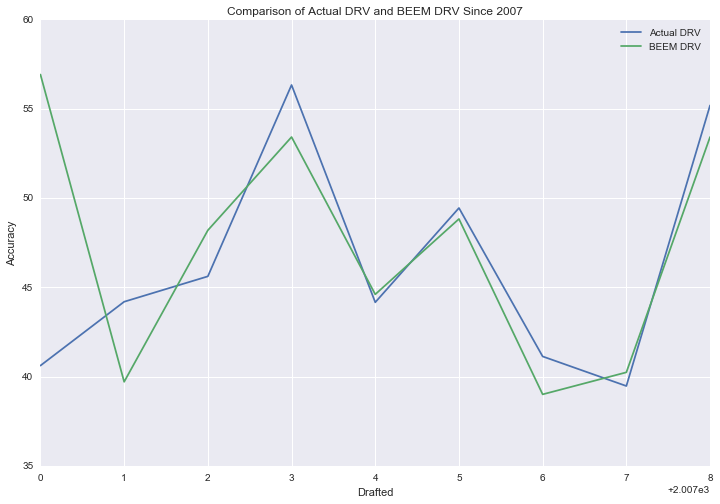

In [26]:
# Create plot of two models
df7 = pd.concat([actual, model], axis=1)
df7.plot.line(figsize=(12, 8))
plt.title('Comparison of Actual DRV and BEEM DRV Since 2007')
plt.ylabel('Accuracy')
plt.figure()

In [27]:
df_year = df6.loc[df6['Drafted'] == 2012]
df_year.sort('FinalPred', ascending=False)[['Name', 'LinearPred', 'SecondPred', 'ThirdPred', 'AvgPred', 'FinalPred']]

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Name,LinearPred,SecondPred,ThirdPred,AvgPred,FinalPred
40,Anthony Davis,6.184406,7.365465,7.876390,7.493196,7.493196
485,Michael Kidd-Gilchrist,4.542200,4.326164,3.272570,4.062765,4.062765
205,Draymond Green,3.396363,4.235124,3.553291,4.064665,4.019990
305,Jared Sullinger,4.584419,3.709492,4.342949,3.867856,4.004472
72,Bradley Beal,4.657558,3.939414,3.974628,3.948218,3.948218
343,John Henson,2.361548,3.737270,3.185758,3.599392,3.861419
665,Tony Wroten,4.499977,3.692789,3.927426,3.751449,3.751449
589,Royce White,4.140646,3.662933,3.704884,3.673421,3.673421
650,Thomas Robinson,3.737994,3.451431,3.529678,3.470993,3.610045
480,Maurice Harkless,3.687235,3.556304,3.537857,3.551692,3.551692


## Investigate out-of-sample prediction using the 2017 NBA Draft

In [28]:
# Import 2017 data and apply BEEM algorithm
df2017 = pd.DataFrame.from_csv('data.csv')
df2017 = df2017.loc[df2017['Drafted'] == 2017]

X = df2017[feature_cols].fillna(np.mean(df2017[feature_cols]))
scaler = MinMaxScaler()
X = pd.DataFrame(X, columns=feature_cols)

pred = lr.predict(X)
df2017['LinearPred'] = pred
X = df2017[feature_cols1].fillna(0)
X = pd.DataFrame(X, columns=feature_cols1)

pred2 = estimators[0].predict(X)
df2017['Prediction'] = pred2
df2017['SecondPred'] = df2017['LinearPred'] + df2017['Prediction']

X = df2017[feature_cols2].fillna(0)
X = pd.DataFrame(X, columns=feature_cols2)

pred2 = estimators2[0].predict(X)
df2017['Prediction2'] = pred2
df2017['ThirdPred'] = df2017['LinearPred'] + df2017['Prediction2']

df2017['AvgPred'] = 0.75*df2017['SecondPred'] + 0.25*df2017['ThirdPred']

g = df2017.groupby('Url')
last = list(df2017['Drafted'] - df2017['Season'])
weights = []
for item in last:
    if item == 0:
        weights.append(1)
    elif item == 1:
        weights.append(0.4)
    elif item == 2:
        weights.append(0.15)
    else:
        weights.append(0)
df2017['Weights'] = weights
df2017['PredxWeights'] = (df2017.AvgPred * df2017.Weights) / (g.Weights.transform("sum"))
df2017['FinalPred'] = df2017.groupby('Url').PredxWeights.transform('sum').fillna(df2017['AvgPred'])
        
df2017.groupby('Name').last().reset_index().sort('FinalPred', ascending=False)[['Name', 'Season', 'Age', 'FinalPred', 'Pick']]

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:43: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Name,Season,Age,FinalPred,Pick
41,Markelle Fultz,2017.0,18.589954,6.184800,1.0
9,Dennis Smith,2017.0,19.100913,4.858561,9.0
29,Jonathan Isaac,2017.0,19.244521,4.738473,6.0
27,John Collins,2017.0,19.273059,4.634877,19.0
58,Zach Collins,2017.0,19.117352,4.532045,10.0
38,Lonzo Ball,2017.0,19.178767,4.526856,2.0
26,Jayson Tatum,2017.0,18.827854,4.514467,3.0
37,Lauri Markkanen,2017.0,19.609132,4.459303,7.0
50,T.J. Leaf,2017.0,19.670548,4.343218,18.0
25,Jawun Evans,2017.0,20.431507,4.281742,39.0
